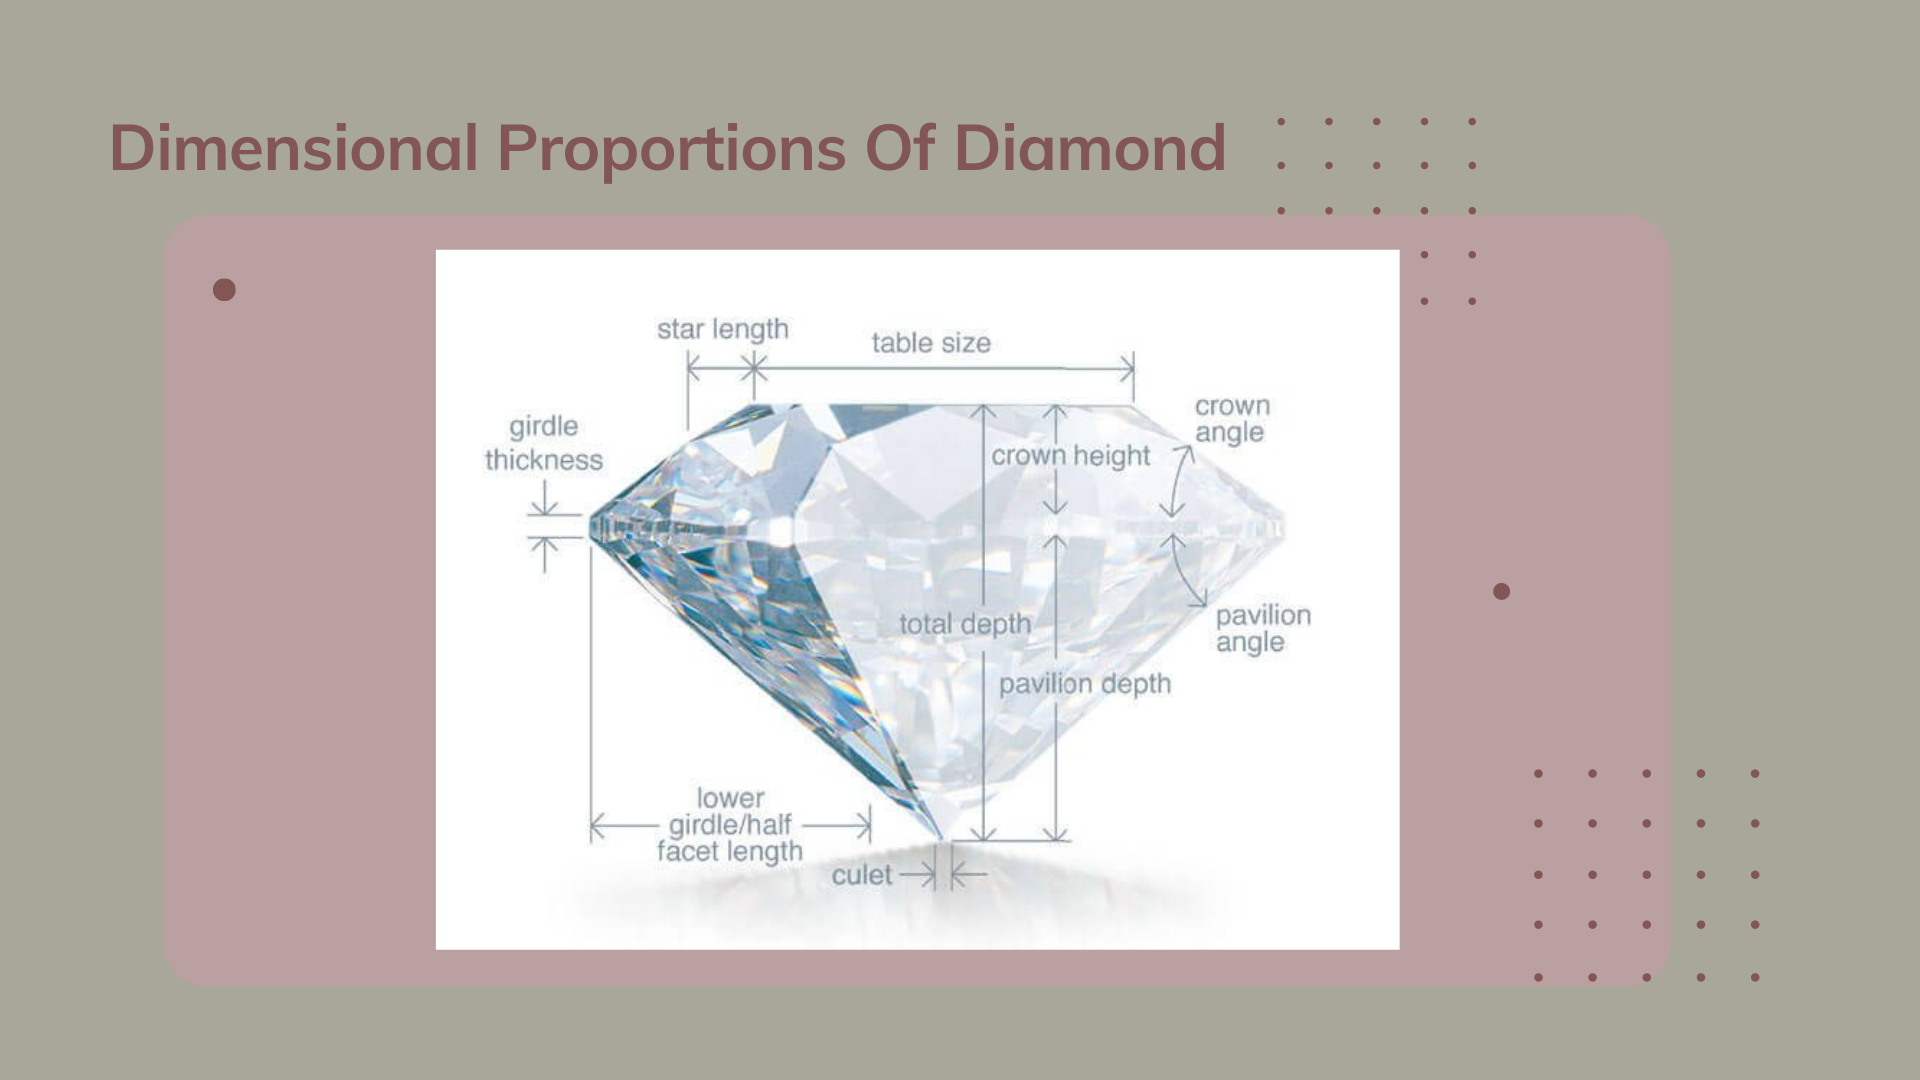

In [1]:
from IPython.display import Image

# Path to your image
proportions = r"C:\Users\Admin\Diamond_Project\Images\proportions.png"


# Display the image
Image(filename=proportions)


In [5]:
# Price Prediction of Diamonds: Regression
'''
Building a machine learning reression model to predict the price of diamonds
based on features like carat,cut,color,clarity.
'''

# Diamond 4 important factors: Clarity,Color,Cut,Carat Weight - Reference GIA

'''
Colorless diamonds are scarce—most diamonds have tints of yellow or brown.
So a colorless diamond rates higher on the color grading scale than a diamond
that is light yellow.
'''

'\nColorless diamonds are scarce—most diamonds have tints of yellow or brown.\nSo a colorless diamond rates higher on the color grading scale than a diamond\nthat is light yellow.\n'

Diamonds Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Diamond ID     53940 non-null  int64  
 1   carat          53940 non-null  float64
 2   carat(g)       53940 non-null  float64
 3   carat(points)  53940 non-null  float64
 4   cut            53940 non-null  object 
 5   color          53940 non-null  object 
 6   clarity        53940 non-null  object 
 7   depth          53940 non-null  float64
 8   table          53940 non-null  float64
 9   price          53940 non-null  int64  
 10  price₹         53940 non-null  float64
 11  x              53940 non-null  float64
 12  y              53940 non-null  float64
 13  z              53940 non-null  float64
 14  table width    53940 non-null  float64
dtypes: float64(10), int64(2), object(3)
memory usage: 6.2+ MB

Top 5 Diamonds Dataset:
    Diamond ID  carat  ca

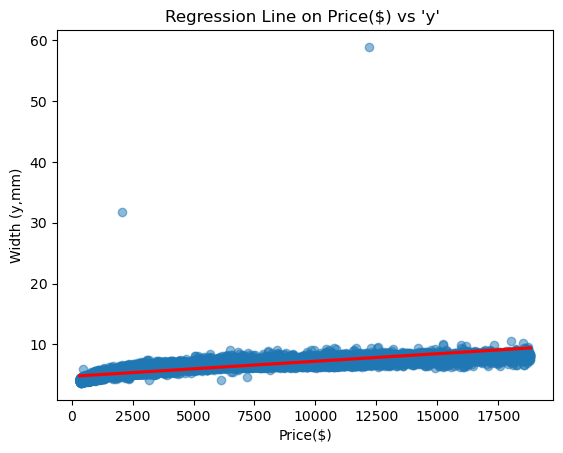

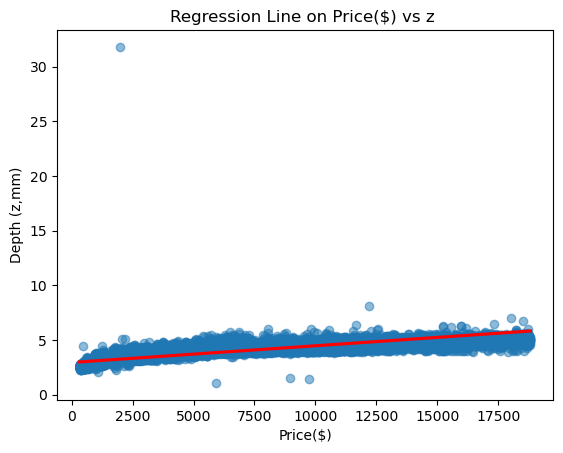

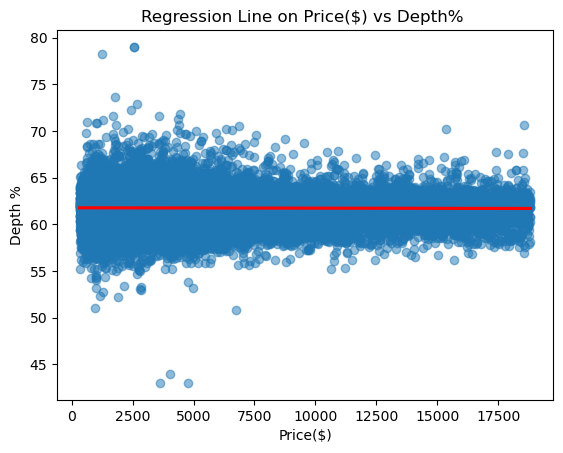

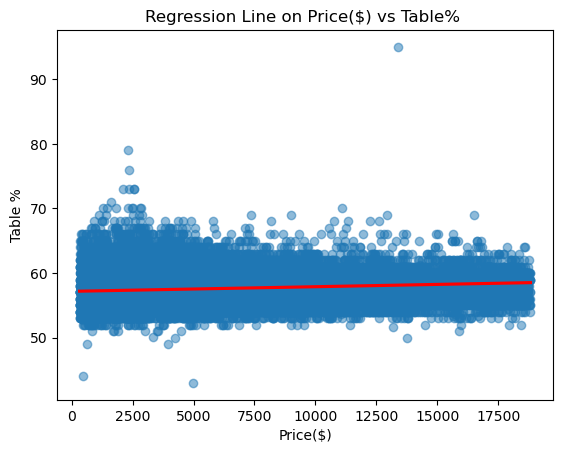

         carat  carat(g)  carat(points)    depth    table    price     price₹  \
count 53920.00  53920.00       53920.00 53920.00 53920.00 53920.00   53920.00   
mean      0.80      0.16          79.77    61.75    57.46  3930.99  332562.03   
std       0.47      0.09          47.38     1.43     2.23  3987.28  337323.93   
min       0.20      0.04          20.00    43.00    43.00   326.00   27579.60   
25%       0.40      0.08          40.00    61.00    56.00   949.00   80285.40   
50%       0.70      0.14          70.00    61.80    57.00  2401.00  203124.60   
75%       1.04      0.21         104.00    62.50    59.00  5323.25  450346.95   
max       5.01      1.00         501.00    79.00    95.00 18823.00 1592425.80   

             x        y        z  table width  
count 53920.00 53920.00 53920.00     53920.00  
mean      5.73     5.73     3.54         3.30  
std       1.12     1.14     0.70         0.68  
min       3.73     3.68     1.07         1.86  
25%       4.71     4.72     2.

In [7]:
# Importing libraries

import numpy as np
'''
What It Is: A library for numerical computations, providing arrays and
mathematical functions.
Role in Project: Handles numerical data (e.g., carat, depth) as arrays for fast
calculations and preprocessing.
How It’s Used: Converts dataset columns to NumPy arrays for model input; 
performs operations like scaling or matrix manipulations.
Outcome/Output: Efficient arrays (e.g., np.array(df['carat'])) for 
model training; enables computations like mean or standard deviation for
feature analysis.
Aim: Ensures fast, accurate numerical processing to prepare data for 
machine learning models.
'''

import pandas as pd
'''
What It Is: A library for data manipulation and analysis, providing DataFrames
for tabular data.
Role in Project: Loads and organizes the diamond dataset; handles missing
values, filtering, and feature selection.
How It’s Used: Reads CSV (pd.read_csv('diamonds.csv')), explores data
(df.head()), and selects features (e.g., df[['carat', 'cut']]).
Outcome/Output: A clean DataFrame (e.g., rows of diamonds with columns like
carat, price) ready for preprocessing and modeling.
Aim: Simplifies data handling to create a structured dataset for analysis 
and model input.
'''
import seaborn as sns
'''
What It Is: A statistical data visualization library built on Matplotlib, 
for creating informative plots.
Role in Project: Visualizes relationships between features
(e.g., carat vs. price) to understand data patterns.
How It’s Used: Creates plots like scatterplots
(sns.scatterplot(x='carat', y='price', data=df)) or heatmaps for correlations.
Outcome/Output: Visual plots (e.g., scatterplot showing carat strongly predicts
price) to guide feature selection and model interpretation.
Aim: Identifies key features and trends to improve model performance through
data insights.
'''
import matplotlib as mpl
'''
What It Is: A foundational plotting library for creating customizable
visualizations.
Role in Project: Provides low-level control for plots, used alongside Seaborn 
or independently.
How It’s Used: Customizes plot settings (e.g., mpl.rcParams['font.size'] = 12) 
or creates basic plots if needed.
Outcome/Output: Enhanced or custom plots (e.g., line plots of model performance)
for project presentation.
Aim: Supports visualization to make data insights
'''
import matplotlib.pyplot as plt
'''
What It Is: A Matplotlib module for plotting, providing a simple interface
for graphs.
Role in Project: Creates and displays plots for data exploration or model
results.
How It’s Used: Plots data (e.g., plt.scatter(df['carat'], df['price']))
and shows them (plt.show()).
Outcome/Output: Graphs (e.g., scatterplot of carat vs. price) to visualize
relationships or model predictions.
Aim: Makes data patterns visible to validate feature importance and model
accuracy.
'''
import matplotlib.pylab as plb
'''
What It Is: A module combining Matplotlib and NumPy for plotting and numerical
tasks (less common, overlaps with pyplot).
Role in Project: Alternative to pyplot for plotting, but rarely needed since
pyplot and seaborn cover most needs.
How It’s Used: Could create plots (e.g., plb.plot()), but likely redundant 
given plt and sns.
Outcome/Output: Similar to pyplot—plots for visualization
(e.g., feature distributions).
Aim: Provides plotting flexibility, though you can skip it to simplify imports.
'''
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, OrdinalEncoder
#OneHotEncoder:
'''
What It Is: A scikit-learn class to encode categorical variables into binary
(0/1) columns.
Role in Project: Converts categorical features (e.g., cut: Fair, Good) into
numeric format for models.
How It’s Used: Encodes cut, color, clarity
(e.g., OneHotEncoder().fit_transform(df[['cut']])).
Outcome/Output: Binary columns (e.g., cut_Fair, cut_Good) added to the dataset 
for model input.
Aim: Enables models to process categorical data, improving prediction accuracy.
'''
#LabelEncoder:
'''
What It Is: A scikit-learn class to encode categorical variables into integers
(e.g., Fair=0, Good=1).
Role in Project: Alternative to OneHotEncoder for ordinal features or simpler
encoding.
How It’s Used: Encodes cut or clarity
(e.g., LabelEncoder().fit_transform(df['cut'])).
Outcome/Output: Integer-encoded column (e.g., cut: [0, 1, 2]) for model input.
Aim: Simplifies categorical data for models, though OneHotEncoder is preferred
for non-ordinal features.
'''
#StandardScalar:
'''
What It Is: A scikit-learn class to standardize numerical features
(mean=0, std=1).
Role in Project: Scales numerical features (e.g., carat, depth) to ensure
equal model influence.
How It’s Used: Scales features
(e.g., StandardScaler().fit_transform(df[['carat']])).
Outcome/Output: Standardized features (e.g., carat values centered around 0)
for better model performance.
Aim: Improves model accuracy by normalizing data, especially for algorithms
like KNN.
'''

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
'''
What It Is: A scikit-learn function to split data into training and testing 
sets.
Role in Project: Divides dataset into train (e.g., 80%) and test (e.g., 20%)
sets for model evaluation.
How It’s Used: Splits data (e.g., train_test_split(X, y, test_size=0.2)).
Outcome/Output: Train/test datasets (e.g., X_train, X_test, y_train, y_test)
for training and validation.
Aim: Ensures model is tested on unseen data to evaluate generalization.
'''
from sklearn.decomposition import PCA
'''
What It Is: A scikit-learn class for Principal Component Analysis to reduce 
dimensionality.
Role in Project: Reduces the number of features (e.g., after one-hot encoding)
to avoid overfitting.
How It’s Used: Applies PCA (e.g., PCA(n_components=2).fit_transform(X)).
Outcome/Output: Reduced feature set (e.g., 2 principal components) for model
input.
Aim: Simplifies data to improve model speed and performance, especially with
many encoded features.
'''
from sklearn.pipeline import Pipeline
'''
What It Is: A scikit-learn class to chain preprocessing and modeling steps.
Role in Project: Combines preprocessing (e.g., scaling, encoding) and modeling 
into one workflow.
How It’s Used: Creates pipeline (e.g., Pipeline([('scaler', StandardScaler()),
('model', LinearRegression())])).
Outcome/Output: A single object that preprocesses and predicts, streamlining 
the process.
Aim: Simplifies code and ensures consistent preprocessing for training and
testing.
'''
from sklearn.tree import DecisionTreeRegressor
'''
What It Is: A scikit-learn class for decision tree regression models.
Role in Project: One of the models to predict diamond prices.
How It’s Used: Trains model
(e.g., DecisionTreeRegressor().fit(X_train, y_train)).
Outcome/Output: Predicted prices (e.g., [5000, 7000]) and model performance
metrics.
Aim: Captures non-linear relationships in data for accurate price predictions.
'''
from sklearn.ensemble import RandomForestRegressor
'''
What It Is: A scikit-learn class for random forest regression
(ensemble of decision trees).
Role in Project: A stronger model to predict diamond prices, often 
outperforming single trees.
How It’s Used: Trains model
(e.g., RandomForestRegressor().fit(X_train, y_train)).
Outcome/Output: More accurate price predictions and performance metrics.
Aim: Improves prediction accuracy by averaging multiple trees.
'''
from sklearn.linear_model import LinearRegression
'''
What It Is: A scikit-learn class for linear regression models.
Role in Project: A baseline model to predict diamond prices.
How It’s Used: Trains model (e.g., LinearRegression().fit(X_train, y_train)).
Outcome/Output: Predicted prices based on linear relationships
(e.g., [5100, 6900]).
Aim: Provides a simple model to compare against more complex ones.
'''

from xgboost import XGBRegressor
'''
What It Is: A powerful gradient boosting regression model from the XGBoost library.
Role in Project: A high-performance model for accurate diamond price predictions.
How It’s Used: Trains model (e.g., XGBRegressor().fit(X_train, y_train)).
Outcome/Output: Highly accurate price predictions, often best-performing.
Aim: Maximizes prediction accuracy for complex data patterns.
'''
from sklearn.neighbors import KNeighborsRegressor
'''
What It Is: A scikit-learn class for k-nearest neighbors regression.
Role in Project: A model to predict prices based on similar diamonds.
How It’s Used: Trains model
(e.g., KNeighborsRegressor().fit(X_train, y_train)).
Outcome/Output: Predicted prices based on nearest neighbors
(e.g., [5200, 7100]).
Aim: Captures local patterns in data for price predictions.
'''
from sklearn.model_selection import cross_val_score
'''
What It Is: A scikit-learn function to perform k-fold cross-validation.
Role in Project: Evaluates model performance across multiple data splits.
How It’s Used: Runs cross-validation (e.g., cross_val_score(model, X, y, cv=5)).
Outcome/Output: Array of scores (e.g., R² values) to assess model reliability.
Aim: Ensures robust model evaluation to select the best model.
'''
from sklearn.metrics import mean_squared_error
'''
What It Is: A scikit-learn function to calculate mean squared error between
predictions and actual values.
Role in Project: Measures prediction error for model evaluation.
How It’s Used: Computes MSE (e.g., mean_squared_error(y_test, y_pred)).
Outcome/Output: A single value (e.g., MSE=150000) indicating prediction error.
Aim: Quantifies model accuracy to compare and improve models.
'''
from sklearn import metrics
'''
What It Is: A scikit-learn module with various evaluation metrics.
Role in Project: Provides additional metrics (e.g., R², MAE) beyond MSE.
How It’s Used: Calculates metrics (e.g., metrics.r2_score(y_test, y_pred)).
Outcome/Output: Scores (e.g., R²=0.85) to evaluate model performance.
Aim: Offers comprehensive evaluation to ensure the best model is chosen.
'''

# Final Output: 
'''
A trained machine learning model (e.g., RandomForestRegressor or XGBRegressor) 
that predicts diamond prices for new data 
(e.g., input: carat=1.0, cut=Good, output: $5000).
'''

df=pd.read_csv(r"C:\Users\Admin\Diamond_Project\diamonds_csv\diamonds.csv")
print("Diamonds Dataset Information:")
df.info()
#53940 Diamonds
#10 Attributes : carat,cut,color,clarity,depth,table,price,x,y,z

top_5=df.head()
print("\nTop 5 Diamonds Dataset:\n",top_5)

min_price=df['price'].min()
print("\nMinimum Price of Diamond:",min_price,"$") #326$  
print(f"Minimum Price of Diamond in rupees: {min_price*84.60:.2f}\u20B9") #27579.6₹  1dollar=84.60 rupees


max_price=df['price'].max()
print("\nMaximum Price of Diamond:",max_price,"$") #18823$
print(f"Maximum Price of Diamond in rupees: {max_price*84.60:.2f}\u20B9") #1592425.80₹

print(f"\nThe price of diamonds ranges from: {min_price}$ - {max_price}$") #326$-18823$
print(f"The price of diamonds ranges from: {min_price*84.60:.2f}\u20B9 - {max_price*84.60:.2f}\u20B9") #27579.60₹ - 1592425.80₹

'''
carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  
One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 
'''
min_wt=df['carat'].min()
print(f"\nMinimum weight of diamond: {min_wt}ct") #0.2ct
print(f"Minimum weight of diamond in grams: {min_wt*0.2:.2f}grams") #0.04grams
print(f"Minimum weight of diamond in points: {min_wt*100} point diamond") #20 point diamond


max_wt=df['carat'].max()
print(f"\nMaximum weight of diamond: {max_wt}ct") #5.01ct
print(f"Maximum weight of diamond: {max_wt*0.2:.2f}grams") #1.00grams
print(f"Maximum weight of diamond in points: {max_wt*100} point diamond") #501 point diamond

print(f"\nThe weight of diamonds ranges from {min_wt}ct to {max_wt}ct.")
print(f"The weight of diamonds ranges from {min_wt*0.2:.2f}grams to {max_wt*0.2:.2f}grams.")
print(f"The weight of diamonds ranges from {min_wt*100}points to {max_wt*100}points.\n")

#Creating a new column price(inr):
#converting dollar to inr : 1dollar=84.60rupees
pd.options.display.float_format = '{:.2f}'.format
df['price\u20B9'] = (df['price']*84.60).map("{:.2f}".format).astype(float)
print(f"Last 5 price\u20B9:\n{df['price\u20B9'].head()}\n")

#reorder the price_inr column
columns = ['Diamond ID', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'price\u20B9', 'x', 'y', 'z']
df = df[columns]

#updated info
df.info()

# #saving updating dataframe to original CSV
df.to_csv(r"C:\Users\Admin\Diamond_Project\diamonds_csv\diamonds.csv", index=False)

print(f"\nTop 5 Updated Data(price\u20B9)\n{df.head()}\n")

#Renaming the index column to Diamond ID
df.rename(columns={'Unnamed: 0': 'Diamond ID'}, inplace=True)
print(f"Renamed Unnamed Column name to Diamond ID:\n{df.head()}")

#Creating a new column carat(grams):
#converting carat to grams : 1carat=0.2grams
pd.options.display.float_format = '{:.2f}'.format
df['carat(g)'] = (df['carat']*0.2).map("{:.2f}".format).astype(float)
print(f"\nLast 5 carat(g):\n{df['carat(g)'].head()}\n")

columns = ['Diamond ID', 'carat','carat(g)', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'price\u20B9', 'x', 'y', 'z']
df = df[columns]

df.info()


#Creating a new column carat(points):
#converting carat to points : 1carat=100points
pd.options.display.float_format = '{:.2f}'.format
df['carat(points)'] = (df['carat']*100).map("{:.2f}".format).astype(float)
print(f"\nLast 5 carat(points):\n{df['carat(points)'].head()}\n")

columns = ['Diamond ID', 'carat','carat(g)','carat(points)', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'price\u20B9', 'x', 'y', 'z']
df = df[columns]
df.to_csv(r"C:\Users\Admin\Diamond_Project\diamonds_csv\diamonds.csv", index=False)

df.info()
print(f"\nTop 5 data with updated columns(carat(g),carat(points)\n{df.head()}")


'''
cut (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning
of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye. 

color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown.
Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different
than from white colorless diamonds.  

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external
characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with
magnification.  

I1 (Included 1):
Full Form: Included, Level 1
Meaning: Lowest clarity grade. Has significant inclusions visible to the naked eye, affecting appearance and durability. Worst quality in your dataset.
Example: Large cracks or clouds reducing sparkle.

SI2 (Slightly Included 2):
Full Form: Slightly Included, Level 2
Meaning: Noticeable inclusions visible under 10x magnification, sometimes visible to the naked eye. Lower clarity but can be cost-effective.
Example: Small feathers or crystals seen with a loupe.

SI1 (Slightly Included 1):
Full Form: Slightly Included, Level 1
Meaning: Minor inclusions visible under 10x magnification, rarely to the naked eye. Slightly better than SI2.
Example: Tiny inclusions needing magnification to spot.

VS2 (Very Slightly Included 2):
Full Form: Very Slightly Included, Level 2
Meaning: Minor inclusions barely visible under 10x magnification, not visible to the naked eye. Good balance of quality and value.
Example: Pinpoint inclusions seen only with effort.

VS1 (Very Slightly Included 1):
Full Form: Very Slightly Included, Level 1
Meaning: Very minor inclusions, difficult to see under 10x magnification, invisible to the naked eye. Higher clarity than VS2.
Example: Microscopic inclusions requiring close inspection.

VVS2 (Very Very Slightly Included 2):
Full Form: Very Very Slightly Included, Level 2
Meaning: Extremely tiny inclusions, very hard to see under 10x magnification. Excellent clarity, nearly flawless.
Example: Minute inclusions only experts can detect.

VVS1 (Very Very Slightly Included 1):
Full Form: Very Very Slightly Included, Level 1
Meaning: Nearly perfect clarity, with inclusions almost impossible to see under 10x magnification. Superior to VVS2.
Example: Infinitesimal inclusions, barely detectable.

IF (Internally Flawless):
Full Form: Internally Flawless
Meaning: No internal inclusions under 10x magnification, only minor external blemishes. Highest clarity grade in your dataset (best).
Example: Virtually perfect internally, rare and valuable.
'''

#Unique Colors
unique_colors=df['color'].unique()
print(f"\nUnique colors in the color column:{sorted(unique_colors)}")

#Verifying clarity grades
unique_clarity_grades=df['clarity'].unique()
print(f"\nUnique clarity grades:{unique_clarity_grades}")

#Unique Cut
unique_cut=df['cut'].unique()
print(f"\nUnique cut grades: {unique_cut}")

#Dimensions min and max
min_x=df['x'].min()
print(f"\nMinimum dimension of x: {min_x}")
max_x=df['x'].max()
print(f"Maximum dimension of x: {max_x}")
print(f"x length in mm: {min_x}-{max_x}")

min_y=df['y'].min()
print(f"\nMinimum dimension of y: {min_y}")
max_y=df['y'].max()
print(f"Maximum dimension of y: {max_y}")
print(f"y length in mm: {min_y}-{max_y}")

min_z=df['z'].min()
print(f"\nMinimum dimension of z: {min_z}")
max_z=df['z'].max()
print(f"Maximum dimension of z: {max_z}")
print(f"z length in mm: {min_z}-{max_z}")

'''
What is Total Depth Percentage?
Depth refers to the height of the diamond (in millimeters) from its culet (the pointed bottom tip) to its table (the flat top surface).
Total Depth Percentage is a ratio that expresses the depth of the diamond relative to its average width (or diameter), helping assess the diamond’s
proportions and how well it reflects light.
In diamonds.csv dataset, the depth column likely represents this percentage, and x, y, z are the diamond’s dimensions in millimeters:
x: Length (width in one direction).
y: Width (in the perpendicular direction).
z: Depth (height from culet to table).

Depth % = z / mean(x, y)
Depth % = 2 * z / (x + y)

mean(x, y): The average of x and y, i.e., (x + y) / 2, representing the approximate diameter of the diamond.

Example:
x = 5.0 mm, y = 5.1 mm, z = 3.1 mm.
Sum: x + y = 5.0 + 5.1 = 10.1 mm.
Depth %: (2 * 3.1) / 10.1 * 100 = 6.2 / 10.1 * 100 ≈ 61.39%.
'''

#Range of depth:
min_depth=df['depth'].min()
print(f"\nMinimum depth: {min_depth}") #may reflect less light
max_depth=df['depth'].max()
print(f"Maximum depth: {max_depth}") #may also affect brilliance
print(f"The depth percentange ranges from: {min_depth}-{max_depth}")

#Table percentage:
'''
Table width of the top of the diamond relative to widest point (43--95)

A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract 
entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give
the diamond stunning fire and brilliance.

Table % = (Table Width) / (Average Diameter) × 100
Table % = (Table Width) / ((x + y) / 2) × 100
'''
#Range of Table %:
min_table=df['table'].min()
max_table=df['table'].max()
print(f"\nMinimum table%: {min_table}")
print(f"Maximum table%: {max_table}")
print(f"The range of table% from: {min_table}-{max_table}")

#Adding new column table width using the above formula Table%:
'''
Table % = (w / ((x + y) / 2)) × 100

Rearrange to solve for w (table width):

Divide both sides by 100: Table % / 100 = w / ((x + y) / 2)
Multiply both sides by ((x + y) / 2): w = (Table % / 100) × ((x + y) / 2)

Simplified:
Table Width (w) = (Table % × (x + y)) / 200
'''
df['table width']=((df['table'])*(df['x']+df['y']))/200
print(f"\ntable width new column:\n{df['table width'].head()}\n")

columns = ['Diamond ID', 'carat','carat(g)','carat(points)', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'price\u20B9', 'x', 'y', 'z', 'table width']
df = df[columns]
df.to_csv(r"C:\Users\Admin\Diamond_Project\diamonds_csv\diamonds.csv", index=False)

df.info()
print(f"\nTop 5 data with updated column table width:\n{df.head()}\n")


#shape of the data
print(f"\nShape of the Data: {df.shape}")

'''
Data Preprocessing:
Steps involved in Data Preprocessing:

1.Data cleaning
2.Identifying and removing outliers
3.Encoding categorical variables
'''

#The first column is an index ("Diamond ID") and thus we are going to remove it.
df=df.drop(['Diamond ID'],axis=1)

#Descriptive statistics for the numerical columns:
num_stat=df.describe()
print(f"\nDescriptive Statistics for the numerical columns:\n{num_stat}")

'''
Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds.
So we need to filter out those as it clearly faulty data points.
'''
# df['x'] == 0: Creates a boolean Series (True where x is 0, False otherwise).
# df[df['x'] == 0]: Filters the DataFrame to show only rows where x is 0.

#zero count and rows x:
zero_count_x=(df['x']==0).sum()
print(f"\nNo.of Zero's in the x column: {zero_count_x}") #8
zero_x_rows=df[df['x']==0]
print(f"Rows with x=0:\n{zero_x_rows}") 

#zero count and rows y:
zero_count_y=(df['y']==0).sum()
print(f"\nNo.of Zero's in the y column: {zero_count_y}") #7
zero_y_rows=df[df['y']==0]
print(f"Rows with y=0:\n{zero_y_rows}")

#zero count and rows z:
zero_count_z=(df['z']==0).sum()
print(f"\nNo.of Zero's in the z column: {zero_count_z}") #20
zero_z_rows=df[df['z']==0]
print(f"Rows with z=0:\n{zero_z_rows}")

#Dropping dimentionless diamonds:
#define rows to drop (where x==0,y==0,z==0)
zero_rows=df[(df['x']==0) | (df['y']==0) | (df['z']==0)].index
#drop all zero rows 
df=df.drop(zero_rows)

#Updated Shape after removing zeros
print(f"\nUpdated Shape: {df.shape}")

# We lost 20 data points by deleting the dimensionless(2-D or 1-D) diamonds.

'''
1. What is a Regression Model?
Definition: A regression model is a machine learning or statistical model used to predict numerical values. It learns the relationship between
input features (e.g., carat, depth, x, y, z) and a target variable (e.g., price or price₹ in your dataset).
You’re likely building a regression model to predict price (or price₹) based on features like carat, cut, color, clarity, depth, table, etc.
The model analyzes patterns in your diamonds.csv data (e.g., higher carat usually means higher price) and makes predictions for new diamonds.

Primary Outcome: Predicted price (or price₹) for each diamond based on input features.
Example: For a diamond with carat=0.5, depth=61.5, etc., the model might predict price=$1000.
Secondary Outcomes:
Model Performance Metrics: Measures like Mean Squared Error (MSE), R² score, or Mean Absolute Error (MAE) to assess how close predictions 
are to actual prices.
MSE tells you the average squared difference between predicted and actual price.
Why It Matters: Clean data (removing outliers, capping extremes) improves prediction accuracy, ensuring the model generalizes well to new diamonds.

What is Capped?
Definition: Capping (or clipping) means setting upper and/or lower limits on a feature’s values to restrict extreme values (outliers).
Values beyond these limits are replaced with the limit.
The statement suggests capping depth and table to limit their values:
Depth: Typically 43–79% (from your dataset). Capping might mean setting values above 75% to 75% or below 50% to 50%.
Table: Typically 50–70%. Capping might mean setting values above 65% to 65%.
Why Cap?: Extreme values (e.g., table=95%, seen in df.describe()) can distort the regression model, leading to poor predictions.

There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.
"y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.
The "depth" should be capped but we must examine the regression line to be sure.
The "table" featured should be capped too.
'''

# Plot regression line of price vs diamond width (y) to explore relationship and detect outliers
sns.regplot(x='price',y='y',data=df,scatter_kws={'alpha':0.5},line_kws={'color':'red'})
plt.ylabel('Width (y,mm)')
plt.xlabel('Price($)')
plt.title("Regression Line on Price($) vs 'y' ")
plt.show()

# Plot regression line of price vs diamond depth (z) to explore relationship and detect outliers
sns.regplot(x='price',y='z',data=df,scatter_kws={'alpha':0.5},line_kws={'color':'red'})
plt.ylabel('Depth (z,mm)')
plt.xlabel('Price($)')
plt.title("Regression Line on Price($) vs z ")
plt.show()

# Plot regression line for price vs. depth%
sns.regplot(x='price',y='depth',data=df,scatter_kws={'alpha':0.5},line_kws={'color':'red'})
plt.ylabel('Depth %')
plt.xlabel('Price($)')
plt.title("Regression Line on Price($) vs Depth% ")
plt.show()

# Plot regression line for price vs. table%
sns.regplot(x='price',y='table',data=df,scatter_kws={'alpha':0.5},line_kws={'color':'red'})
plt.ylabel('Table %')
plt.xlabel('Price($)')
plt.title("Regression Line on Price($) vs Table% ")
plt.show()

#We can clearly spot outliers in these attributes. Next up, we will remove these data points.

print(df.describe())
#from the descriptive statistics numerical column:
'''
Range(min,max):

x : (3.73,10.74)
y : (3.68,58.90)
z : (1.07,31.80)
depth : (43.00,79.00)
table : (43.00,95.00)
'''

# Outliers:
'''
depth: (45,75)
table: (45,90)
x :(3,10)
y: (3,55)
z: (1,30)
'''
#Q1(25%):
'''
x:4.71
y:4.72
z:2.91
depth:61.00
table:56.00
'''
#Q3(75%):
'''
x=6.54
y=6.54
z=4.04
depth=62.50
table=59.00
'''
#IQR(50%):
'''
x:5.70
y=5.71
z=3.53
depth=61.80
table=57.00
'''
#Calculating IQR Bounds:
'''
IQR=Q3-Q1
Lower Bound=Q1-1.5*IQR
Upper Bound=Q3+1.5*IQR
'''
def iqr_bounds(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return lower_bound,upper_bound
features=['x','y','z','depth','table']
lower_bound,upper_bound=iqr_bounds(df[features])
print("\nIQR BOUNDS:")
print(f"x:({lower_bound['x']:.2f},{upper_bound['x']:.2f})")
print(f"y:({lower_bound['y']:.2f},{upper_bound['y']:.2f})")
print(f"z:({lower_bound['z']:.2f},{upper_bound['z']:.2f})")
print(f"depth:({lower_bound['depth']:.2f},{upper_bound['depth']:.2f})")
print(f"table:({lower_bound['table']:.2f},{upper_bound['table']:.2f})")

'''
IQR BOUNDS:
x:(1.96,9.29)
y:(1.99,9.27)
z:(1.22,5.73)
depth:(58.75,64.75)
table:(51.50,63.50)
'''

'''
GIA STANDARDS:

| Feature | GIA Standard Range | Notes |
|---------|--------------------|-------|
| Depth   | 58.0–63.0%         | Ideal range for round brilliant diamonds to maximize brilliance and fire. GIA recommends 58–63% for Excellent cut grades. Slightly broader (50–75%) for fancy cuts, but dataset likely focuses on round cuts. |
| Table   | 53.0–65.0%         | Preferred range for Excellent to Very Good cut grades. GIA suggests 53–58% for ideal proportions, but up to 65% is acceptable for high-quality diamonds. IQR (51.50–63.50%) aligns well. |
| x       | 4.0–10.0 mm        | Typical length for 0.2–2.33 carat round diamonds. Based on GIA’s proportion guidelines and dataset range (3.73–10.74 mm). Larger stones (>2 carats) may reach ~15 mm, but 10 mm covers most high-quality diamonds. |
| y       | 4.0–10.0 mm        | Typical width, similar to x for round diamonds. Dataset max (58.90 mm) is an outlier; GIA’s max ~15 mm for larger stones, but 10 mm is realistic for data. |
| z       | 2.0–6.0 mm         | Typical depth for 0.2–2.33 carat diamonds. GIA suggests z aligns with depth % (z ≈ depth % × diameter). Dataset max (31.80 mm) is an outlier; 6 mm covers most high-quality diamonds. |

'''

'''
FINAL BOUNDS (for max accuracy): #Hybrid comparing range(min,max), IQR Bounds, GIA standards

x: Lower = 3.73, Upper = 11.00
y: Lower = 3.68, Upper = 15.00
z: Lower = 1.07, Upper = 10.00
depth: Lower = 58.00, Upper = 63.00
table: Lower = 51.50, Upper = 63.50
'''

#Dropping the outliers:
df=df[(df['x']>3.73)&(df['x']<11.00)]
df=df[(df['y']>3.68)&(df['y']<15.00)]
df=df[(df['z']>1.07)&(df['z']<10.00)]
df=df[(df['depth']>58.00)&(df['depth']<63.00)]
df=df[(df['table']>51.50)&(df['table']<63.50)]
print(df.shape)
#9043 rows removed 16.8%~ approximately removed

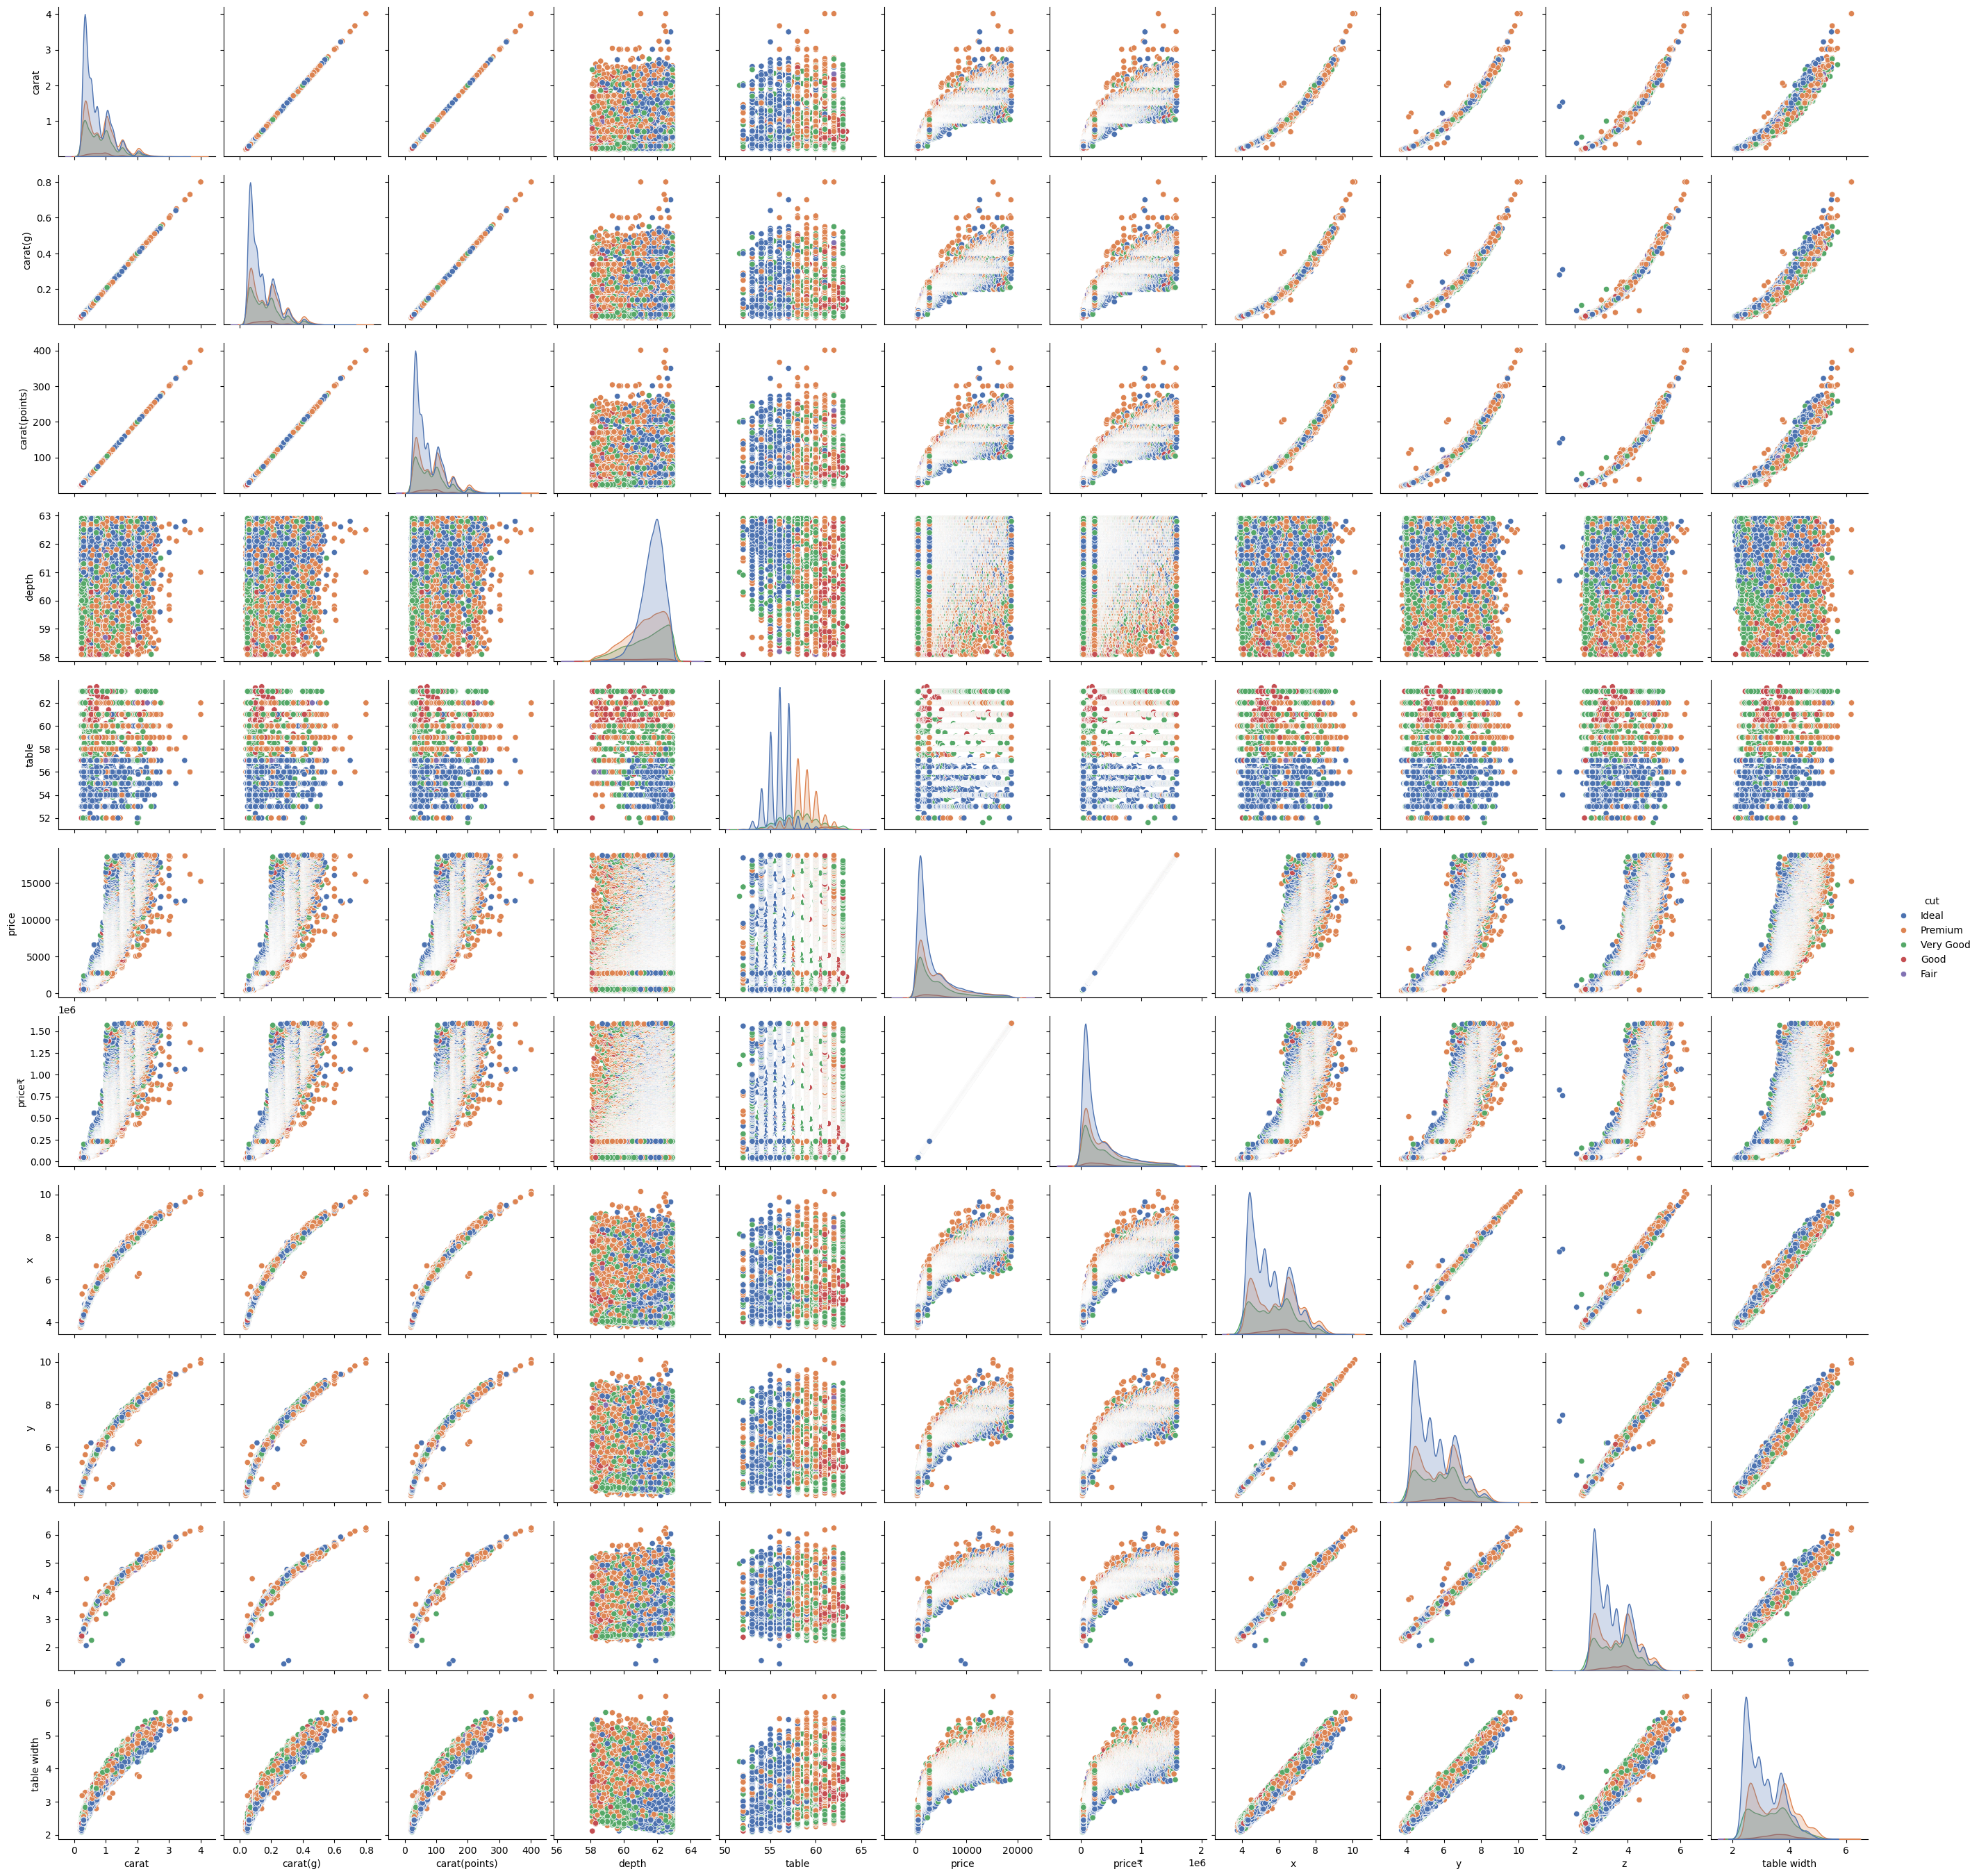

In [8]:
## Pairplot Visualization of Diamond Features
%matplotlib inline
# data_subset_pairplot = df[['carat', 'price', 'depth', 'table','cut']]
ax=sns.pairplot(df,hue='cut',palette='deep')
plt.show()

Categorical_cols: ['cut', 'color', 'clarity']



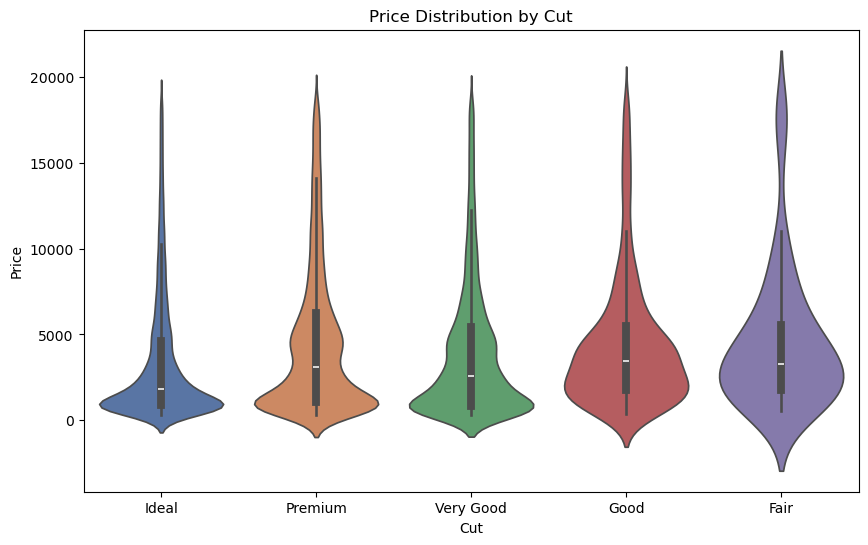

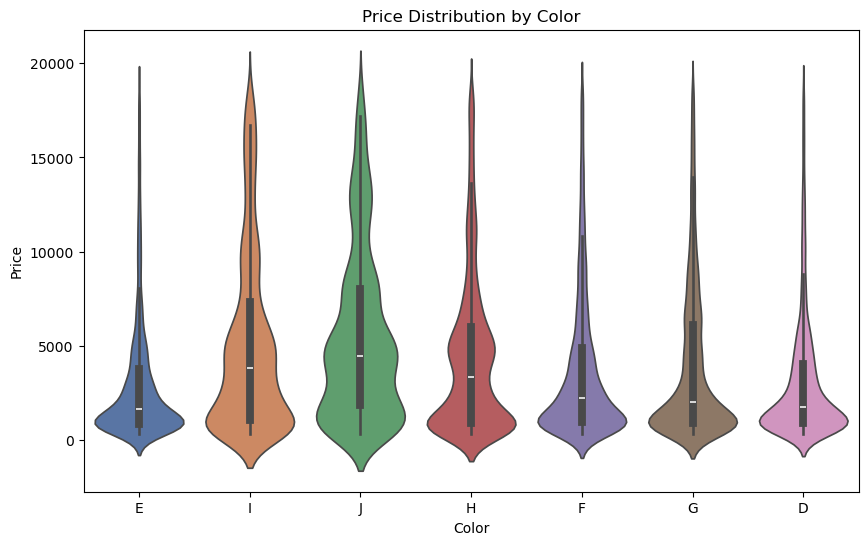

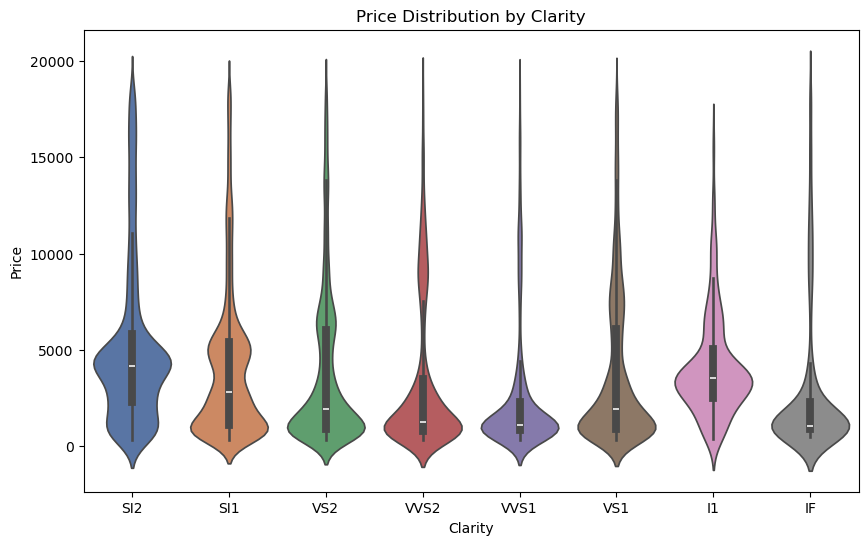

In [11]:
# Get list of categorical variables
s = (df.dtypes =="object")
categorical_cols = list(s[s].index)
print(f"Categorical_cols: {categorical_cols}\n")

#Violinplot
data_subset_violinplot=df[['cut','color','clarity','price']]
for i in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.violinplot(x=i,y='price',hue=i,data=data_subset_violinplot,palette='deep',legend=False)
    plt.title(f"Price Distribution by {i.capitalize()}")
    plt.xlabel(i.capitalize())
    plt.ylabel('Price')
    plt.show()

# Add these plots to your Flask app to show users how cut, color, clarity impact price.

In [13]:
# Lable encoding the data to get rid of object dtype.

# Make copy to avoid changing original data 
label_data=df.copy()
# Apply label encoder to each column with categorical data
label_encoder=LabelEncoder()
for i in categorical_cols:
    label_data[i]=label_encoder.fit_transform(label_data[i])
label_data.head()

carat  carat(g)  carat(points)  cut  color  clarity  depth  table  price  \
0   0.23      0.05          23.00    2      1        3  61.50  55.00    326   
1   0.21      0.04          21.00    3      1        2  59.80  61.00    326   
3   0.29      0.06          29.00    3      5        5  62.40  58.00    334   
5   0.24      0.05          24.00    4      6        7  62.80  57.00    336   
6   0.24      0.05          24.00    4      5        6  62.30  57.00    336   

    price₹    x    y    z  table width  
0 27579.60 3.95 3.98 2.43         2.18  
1 27579.60 3.89 3.84 2.31         2.36  
3 28256.40 4.20 4.23 2.63         2.44  
5 28425.60 3.94 3.96 2.48         2.25  
6 28425.60 3.95 3.98 2.47         2.26

In [15]:
df.describe()

carat  carat(g)  carat(points)    depth    table    price     price₹  \
count 44897.00  44897.00       44897.00 44897.00 44897.00 44897.00   44897.00   
mean      0.78      0.16          78.02    61.46    57.35  3904.20  330295.67   
std       0.47      0.09          46.95     1.01     2.06  4029.24  340874.10   
min       0.20      0.04          20.00    58.10    51.60   326.00   27579.60   
25%       0.38      0.08          38.00    60.90    56.00   926.00   78339.60   
50%       0.70      0.14          70.00    61.70    57.00  2290.00  193734.00   
75%       1.05      0.21         105.00    62.20    59.00  5355.00  453033.00   
max       4.01      0.80         401.00    62.90    63.40 18823.00 1592425.80   

             x        y        z  table width  
count 44897.00 44897.00 44897.00     44897.00  
mean      5.70     5.70     3.50         3.27  
std       1.13     1.12     0.69         0.68  
min       3.76     3.72     1.41         2.08  
25%       4.67     4.69     2.87         2.66  
50%       5.66     5.66     3.47         3.20  
75%       6.55     6.55     4.02         3.79  
max      10.14    10.10     6.24         6.19

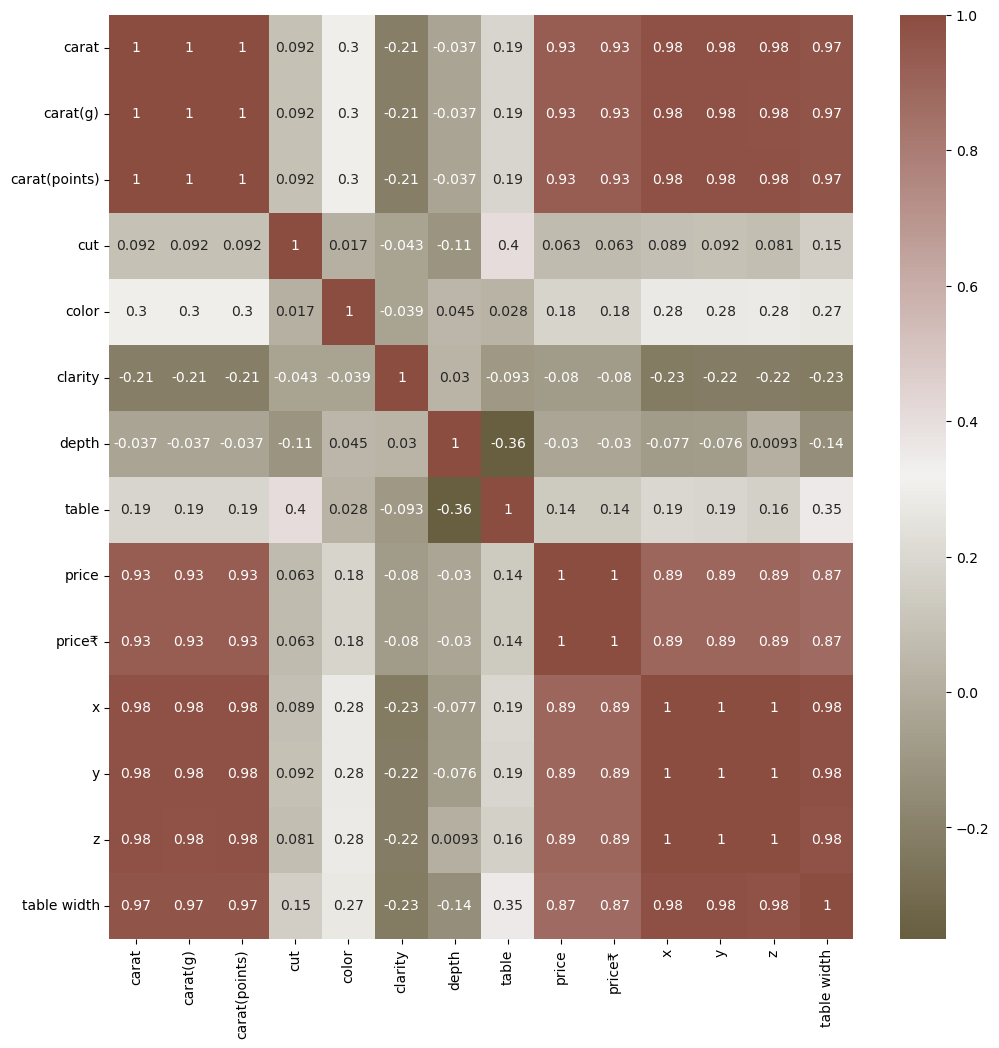

In [17]:
#correlation matrix

'''
Parameters:
70, 20: Hue values for the palette’s extremes (diverging from a neutral center, e.g., blue to red).
s=50: Saturation (50% intensity, moderate vividness).
l=40: Lightness (40% brightness, not too dark or light).
n=6: Number of colors (6 discrete shades for the gradient).
as_cmap=True: Returns a continuous colormap (matplotlib object) for sns.heatmap, ensuring smooth color transitions.
'''

'''
cmap:
Stores the colormap, which will color the heatmap based on correlation values 
(e.g., negative correlations in blue, positive in red, neutral near white).

 1: Perfect positive correlation (e.g., x and y dimensions).
0: No correlation.
-1: Perfect negative correlation.

cmap=cmap:
Applies the custom diverging palette (blue-neutral-red) to color the heatmap based on correlation values.
Example: High positive correlations (e.g., 0.9) in red, negative correlations (e.g., -0.5) in blue, near-zero in white.

annot=True:
Annotates each cell with the correlation value (e.g., 0.92, -0.15), making the heatmap easier to interpret.
'''

cmap=sns.diverging_palette(70,20,s=50,l=40,n=6,as_cmap=True)
corrmat=label_data.corr()
f,ax_1=plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True)
plt.show()

In [19]:
#MODEL BUILDING
'''
Model Building
Steps involved in Model Building

Setting up features and target
Build a pipeline of standard scalar and model for five different regressors.
Fit all the models on training data
Get mean of cross-validation on the training set for all the models for negative root mean square error
Pick the model with the best cross-validation score
Fit the best model on the training set and get
'''

'''
test_size=0.25:
Specifies that 25% of the data goes to the test set, and 75% to the training set.
Total rows: 44,897.
Training set: 75% = 33,672 rows.
Test set: 25% = 11,225 rows.
'''
# # Assigning the features as X and target as Y
# X=label_data.drop(['price'],axis=1)
# Y=label_data['price']
# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=7)

# # Building pipelines of standard scaler and model for various regressors.
# pipeline_lr=Pipeline([('scalar1',StandardScaler()),('lr_classifier',LinearRegression())])
# pipeline_dt=Pipeline([('scalar2',StandardScaler()),('dt_classifier',DecisionTreeRegressor())])
# pipeline_rf=Pipeline([('scalar3',StandardScaler()),('rf_classifier',RandomForestRegressor())])
# pipeline_kn=Pipeline([('scalar4',StandardScaler()),('kn_classifier',KNeighborsRegressor())])
# pipeline_xgb=Pipeline([('scalar5',StandardScaler()),('xgb_classifier',XGBRegressor())])

# # List of all the pipelines
# pipelines=[pipeline_lr,pipeline_dt,pipeline_rf,pipeline_kn,pipeline_xgb]

# # Dictionary of pipelines and model types for ease of reference
# pipe_dict={0:'LinearRegression',1:'DecisionTree',2:'RandomForest',3:'KNeighbors',4:'XGBRegressor'}

#Fit the pipelines
# for i in pipelines:
#     i.fit(X_train,Y_train)

# cv_results_rms=[]
# for i,model in enumerate(pipelines):
#     cv_score=cross_val_score(model,X_train,Y_train,scoring='neg_root_mean_squared_error',cv=10)
#     cv_results_rms.append(cv_score)
#     print('%s: %f ' % (pipe_dict[i],cv_score.mean()))

  
print(label_data.columns)
print('\n')

# Check correlations for redundant features
corr_matrix=label_data[['carat','carat(g)','carat(points)','table','table width']].corr()
print(f"Correlation Matrix for Redundant Features:\n,{corr_matrix}")

# Drop redundant and leakage columns:
columns_to_drop=['price','price₹','carat(g)','carat(points)','table width']
print(f"\n Dropped 'table width' as it is a derived feature from 'table'")
# if corr_matrix.loc['table','table width']>0.9:
#     columns_to_drop.append('table width')
#     print("Dropped 'table width' due to high correlation with 'table'")

X=label_data.drop(columns_to_drop,axis=1)
Y=label_data['price']

#Verify no leakage:
print("Columns in X:", X.columns)
if 'price' in X.columns or 'price₹' in X.columns:
    raise ValueError('Price or Price₹ found in X-data leakage!')

#split the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=7)

#Identify categorical and numerical columns
categorical_cols=['cut','color','clarity']
numerical_cols=X.select_dtypes(include=['float64','int64']).columns.tolist()
print('Categorical Columns:', categorical_cols)
print('Numerical Columns:', numerical_cols)

#Create preprocessor
preprocessor=ColumnTransformer(transformers=[('cat',OrdinalEncoder(),categorical_cols),('num',StandardScaler(),numerical_cols)])

#Building pipelines with preprocessor and model
pipeline_lr=Pipeline([('preprocessor', preprocessor),('lr_classifier', LinearRegression())])
pipeline_dt=Pipeline([('preprocessor',preprocessor),('dt_classifier',DecisionTreeRegressor(random_state=7))])
pipeline_rf=Pipeline([('preprocessor',preprocessor),('rf_classifier',RandomForestRegressor(random_state=7))])
pipeline_kn=Pipeline([('preprocessor', preprocessor),('kn_classifier', KNeighborsRegressor(n_neighbors=10))])
pipeline_xgb=Pipeline([('preprocessor', preprocessor),('xgb_classifier', XGBRegressor(random_state=7, learning_rate=0.1, max_depth=6))])

#List of all the pipelines
pipelines=[pipeline_lr,pipeline_dt,pipeline_rf,pipeline_kn,pipeline_xgb]

#Dictionary of pipelines and model types for ease of reference
pipe_dict={0:'LinearRegression',1:'DecisionTree',2:'RandomForest',3:'KNeighbors',4:'XGBRegressor'}

#Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train,Y_train)

#cross-validation with neg_root_mean_squared_error
cv_results_rms=[]
for i,model in enumerate(pipelines):
    cv_score=cross_val_score(model,X_train,Y_train,scoring='neg_root_mean_squared_error',cv=10)
    cv_results_rms.append(cv_score)
    print('%s: %f: ' % (pipe_dict[i], cv_score.mean()))



Index(['carat', 'carat(g)', 'carat(points)', 'cut', 'color', 'clarity',
       'depth', 'table', 'price', 'price₹', 'x', 'y', 'z', 'table width'],
      dtype='object')


Correlation Matrix for Redundant Features:
,               carat  carat(g)  carat(points)  table  table width
carat           1.00      1.00           1.00   0.19         0.97
carat(g)        1.00      1.00           1.00   0.19         0.97
carat(points)   1.00      1.00           1.00   0.19         0.97
table           0.19      0.19           0.19   1.00         0.35
table width     0.97      0.97           0.97   0.35         1.00

 Dropped 'table width' as it is a derived feature from 'table'
Columns in X: Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')
Categorical Columns: ['cut', 'color', 'clarity']
Numerical Columns: ['carat', 'depth', 'table', 'x', 'y', 'z']
LinearRegression: -1283.636064: 
DecisionTree: -713.480166: 
RandomForest: -525.231413: 
KNeighbors: -748.2

In [21]:
#Testing the Model with the best score on the test set

#In the above scores, XGBClassifier appears to be the model with the best scoring on negative root mean square error. 
#Let's test this model on a test set and evaluate it with different parameters.

#Model Prediction on test data
pred=pipeline_xgb.predict(X_test)

#Model Evaluation
print("R^2:", metrics.r2_score(Y_test,pred))
print("Adjusted R^2:", 1 - (1-metrics.r2_score(Y_test,pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(Y_test,pred))
print("MSE:",metrics.mean_squared_error(Y_test,pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test,pred)))

R^2: 0.9832466840744019
Adjusted R^2: 0.9832332395943902
MAE: 273.98657306764596
MSE: 276518.8544509962
RMSE: 525.8506008848865


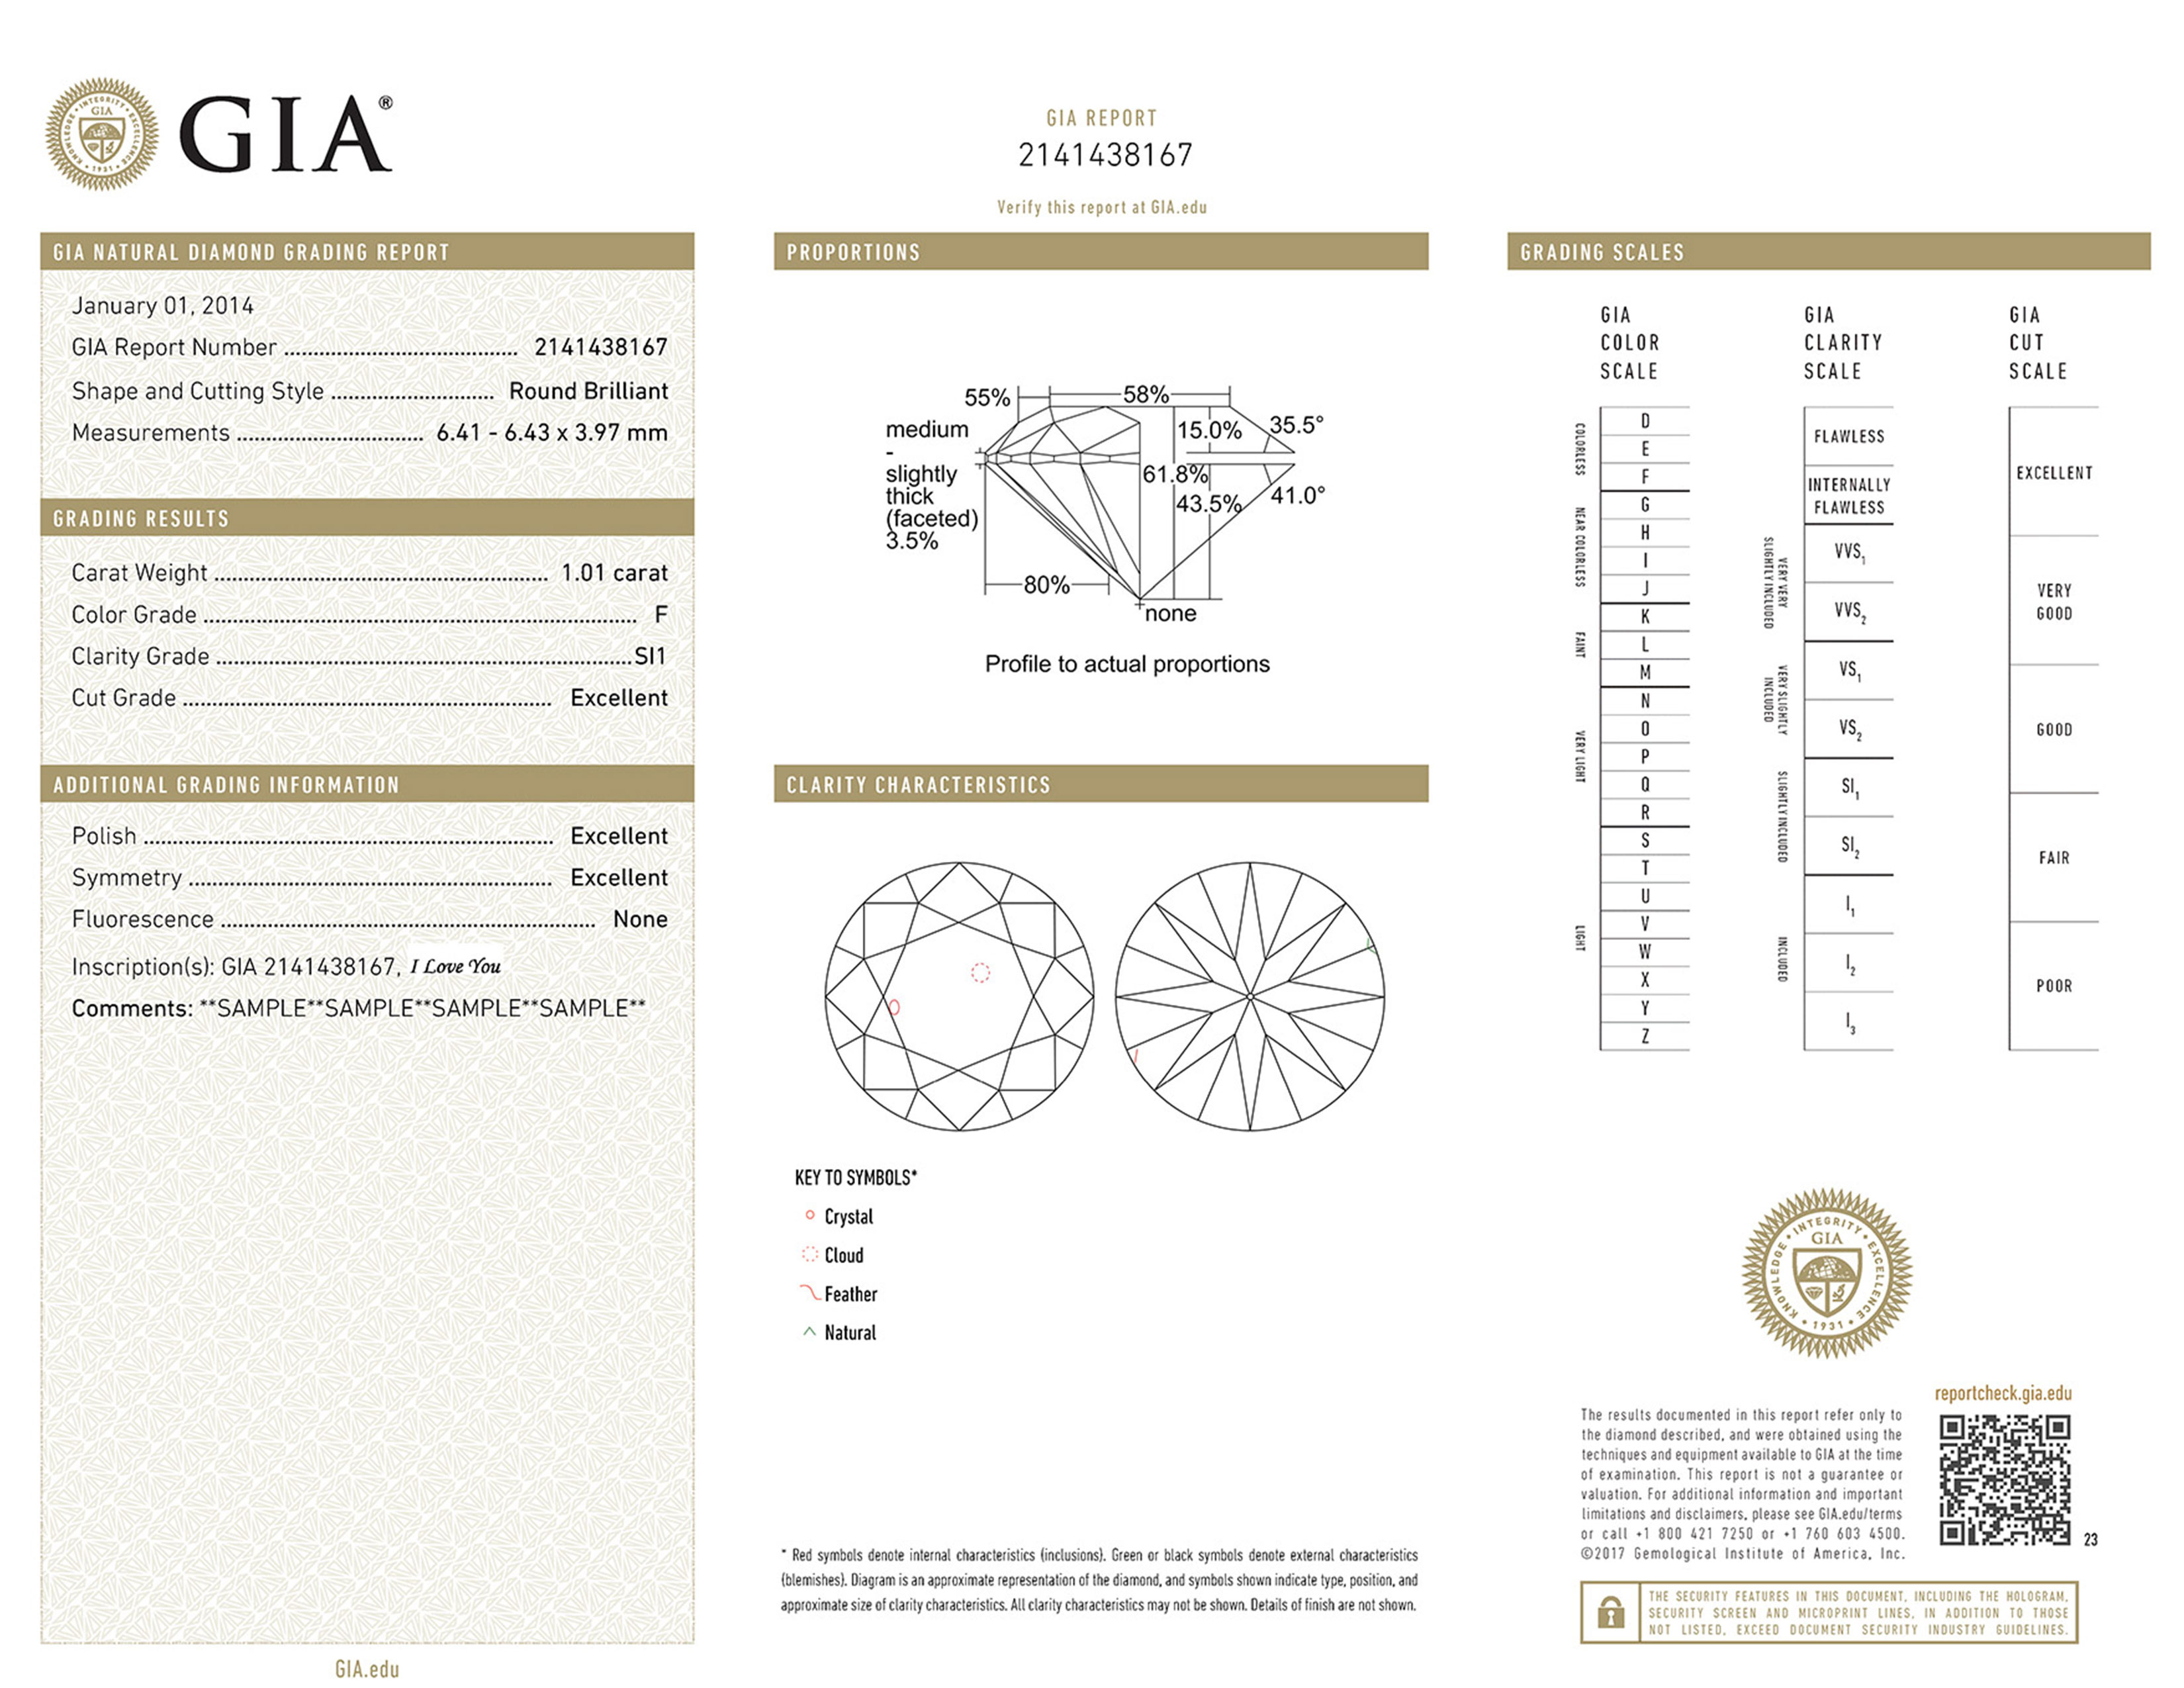

In [23]:
report = r"C:\Users\Admin\Diamond_Project\Images\gia_report.jpg"
Image(filename=report)

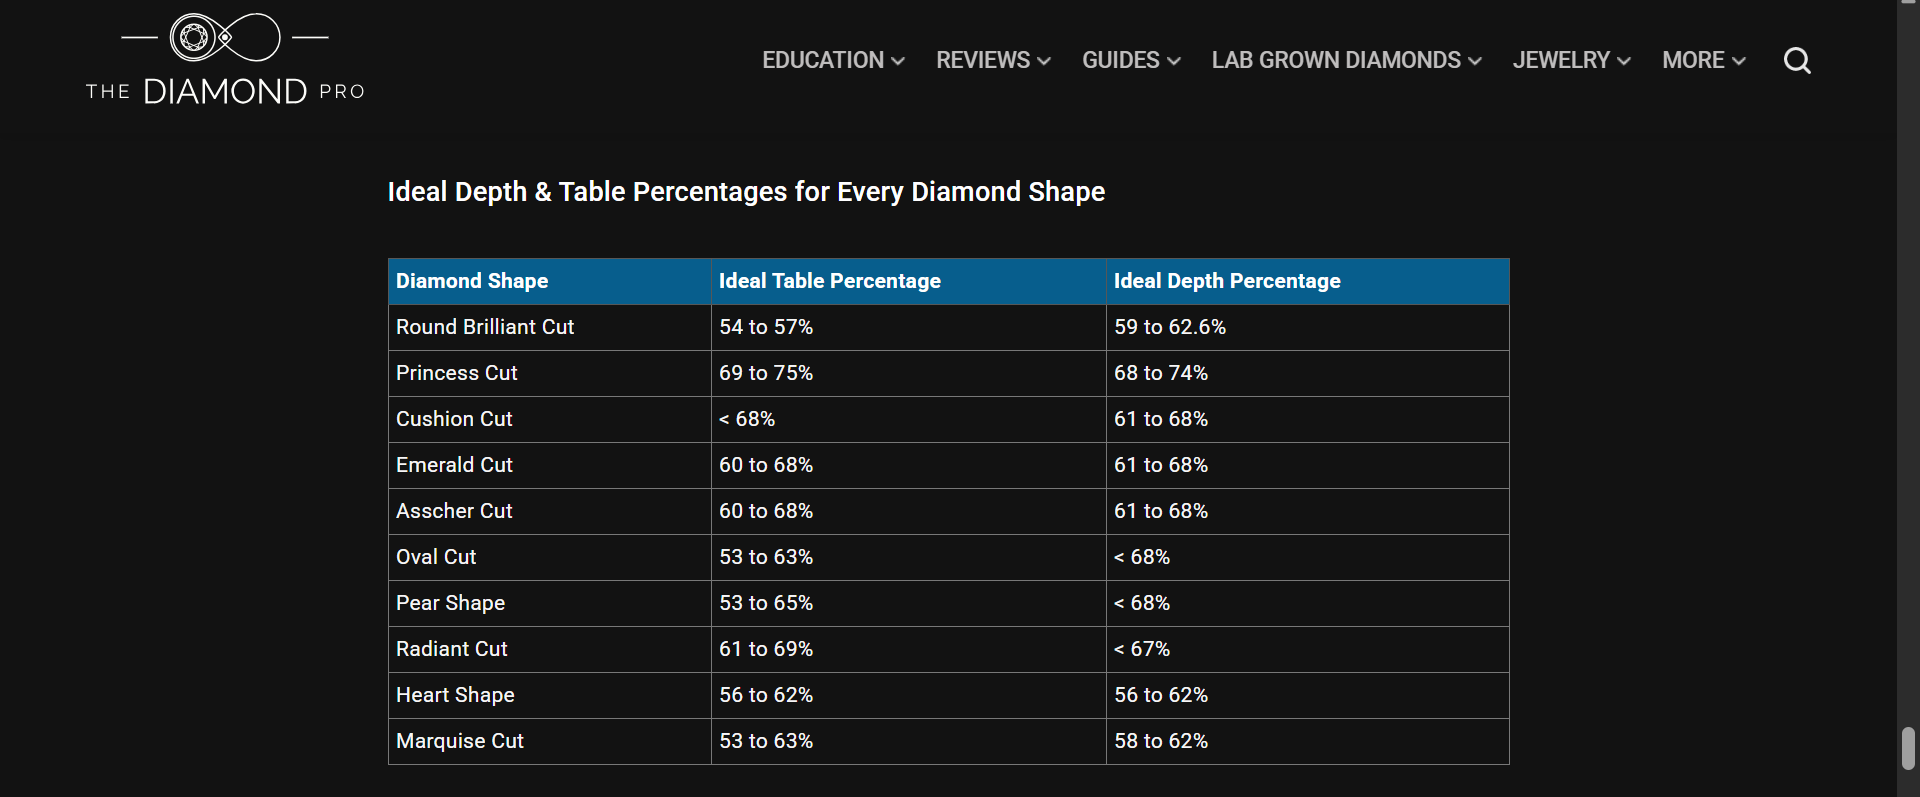

In [25]:
depth_table=r"C:\Users\Admin\Diamond_Project\Images\depth_table.png"
Image(filename=depth_table)